# California Houses

Este dataset se deriva del censo de 1990 de EEUU, donde cada observación es un bloque. Un bloque es la unidad geográfica más pequeña para la cual la Oficina del Censo de EEUU publica datos de muestra (un bloque típicamente tiene una población de 600 a 3000 personas).

Atributos
* **MedInc:** Ingreso medio en el bloque
* **HouseAge:** Edad mediana de las casas en el bloque
* **AveRooms:** Número promedio de habitaciones por hogar.
* **AveBedrms:** Número promedio de dormitorios por hogar.
* **Population:** Población del bloque
* **AveOccup:** Número promedio de miembros por hogar.
* **Latitude:** Latitud del bloque
* **Longitude:** Longitud del bloque
Y el target es:

* **MedHouseVal:** Mediana del costo de casas en el bloque (en unidades de a $100.000)

## Tratamiento de datos

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

from sklearn.linear_model import LinearRegression, Ridge

sns.set()

In [2]:
# Leemos el dataset
california_housing = fetch_california_housing()

# Y obtenemos los atributos y target
X = california_housing.data
y = california_housing.target

# Transformamos en Pandas
X = pd.DataFrame(X, columns=california_housing['feature_names'])
y = pd.Series(y, name=california_housing['target_names'][0])

# Unimos a X e y, esto ayuda a la parte de la gráfica del mapa de calor de correlación
df_california = pd.concat([X, y], axis=1)

In [3]:
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [4]:
y.head()

0    4.526
1    3.585
2    3.521
3    3.413
4    3.422
Name: MedHouseVal, dtype: float64

In [5]:
df_california.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [6]:
df_california.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


* No se observan valores nulos.

In [7]:
df_california.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


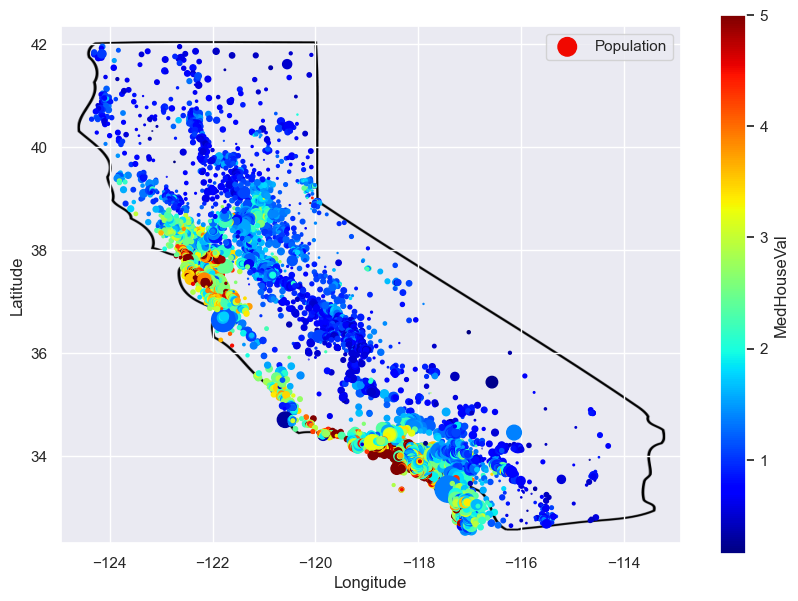

In [8]:
df_california.plot(kind="scatter", x="Longitude", y="Latitude", grid=True,
             s=df_california["Population"] / 100, label="Population",
             c="MedHouseVal", cmap="jet", colorbar=True,
             legend=True, sharex=False, figsize=(10, 7))

filename = "california.png"
california_img = plt.imread(filename)
axis = -124.95, -112.9, 32.3, 42.35
plt.axis(axis)
plt.imshow(california_img, extent=axis)

plt.show()

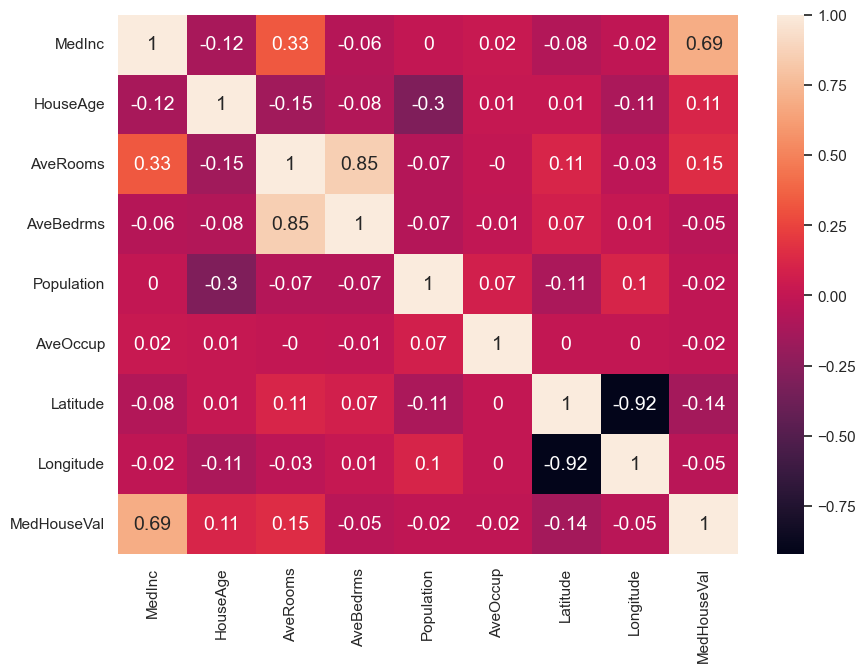

In [9]:
# Headmap con las correlaciones entre variables y variables y target.

plt.figure(figsize=(10, 7))
correlacion_profit = df_california.corr().round(2)
sns.heatmap(data=correlacion_profit, annot=True, annot_kws={"size": 14})
plt.show()

In [10]:
# Cálculo de correlaciones respecto a MedHouseVal.

target_correlation = correlacion_profit['MedHouseVal'].sort_values(ascending=False)
print(target_correlation)

MedHouseVal    1.00
MedInc         0.69
AveRooms       0.15
HouseAge       0.11
Population    -0.02
AveOccup      -0.02
AveBedrms     -0.05
Longitude     -0.05
Latitude      -0.14
Name: MedHouseVal, dtype: float64


#### Interpretacion 

* El atributo que tiene mayor correlación con el target (MedHouseVal), es MedInc, que es el Ingreso medio en el bloque.  Latitude y Longitude presentan alta correlación negativa producto de la distribución greográfica de California, en donde los puntos siguen un patrón aproximado de recta con pendiente negativa. Otros de los atributos que presentan alta correlación entre si son AveRooms y AveBedrms.

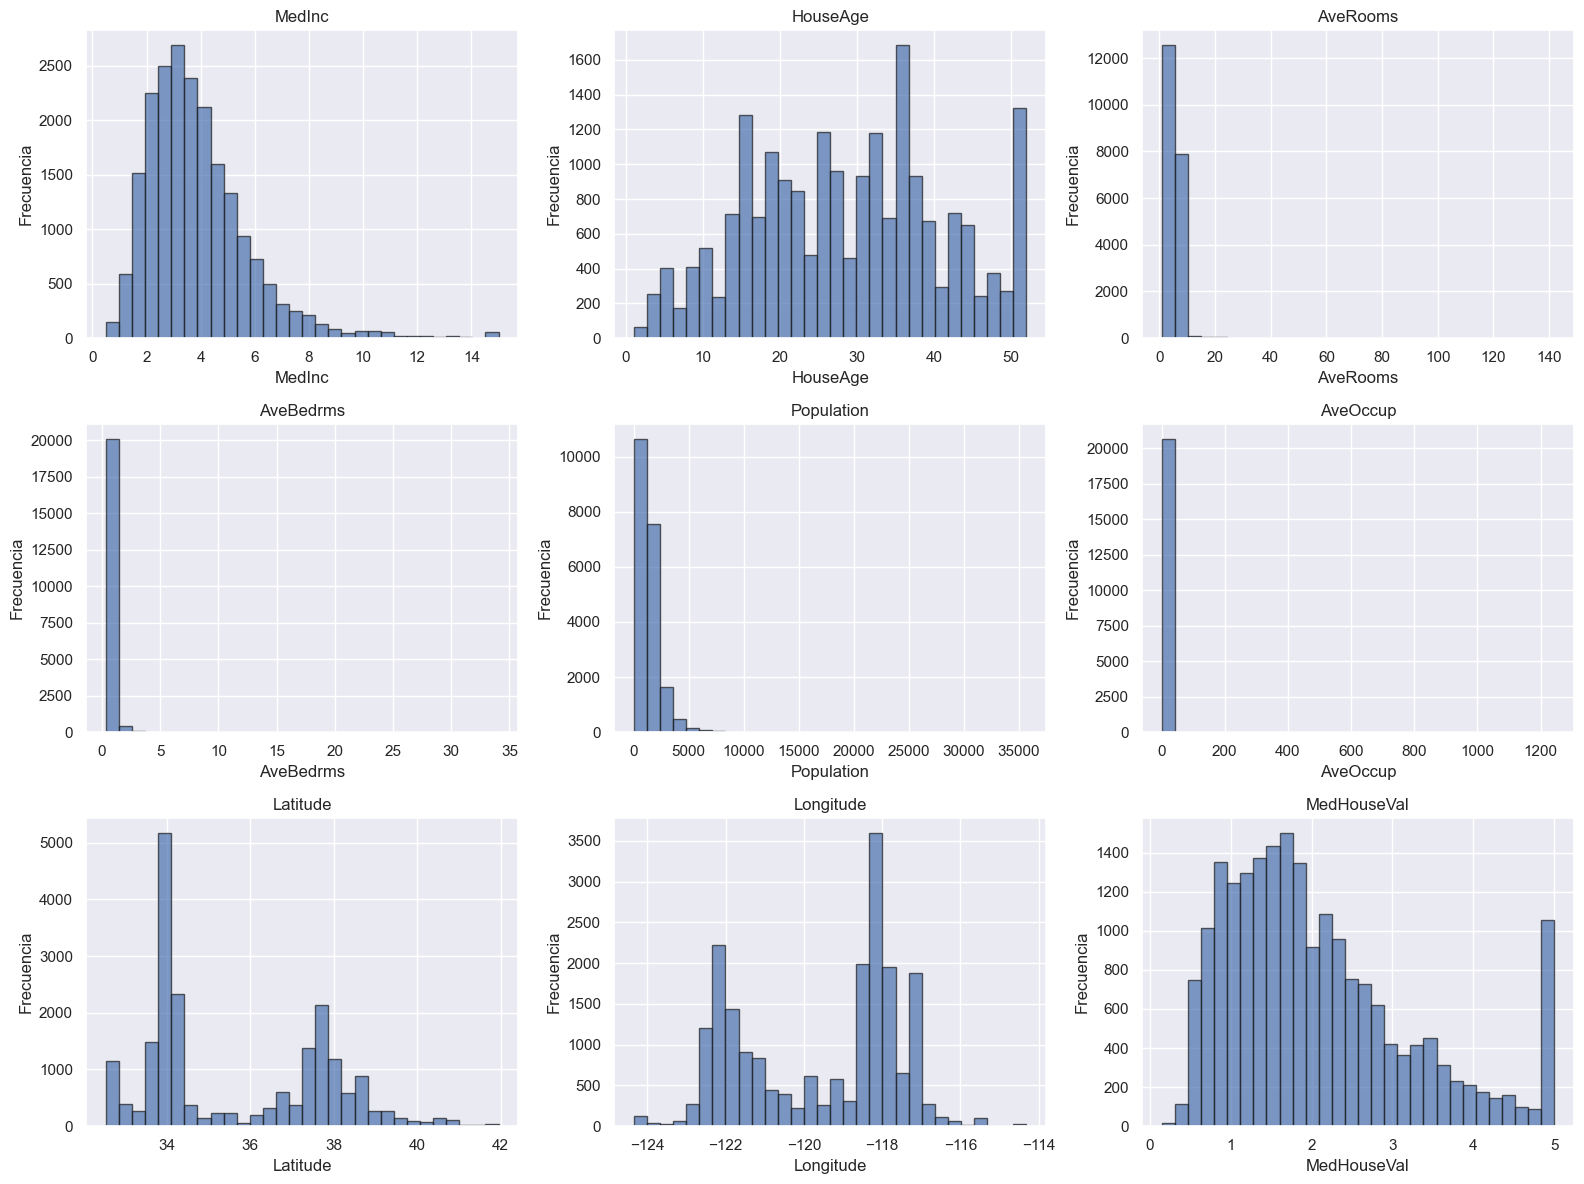

In [11]:
# Histograma de los atributos y el target.
plt.figure(figsize=(16, 12))

for i, column in enumerate(df_california.columns, 1):
    plt.subplot(3, 3, i)
    plt.hist(df_california[column], bins=30, edgecolor='k', alpha=0.7)
    plt.title(column)
    plt.xlabel(column)
    plt.ylabel('Frecuencia')

plt.tight_layout()
plt.show()

#### Interpretación

* Se observa que la mayoría de los histogramas son asimétricos positivos, con carencia de datos en la parte derecha de la cola. En el caso de MedHouseVal, se sospecha que el bin que contiene al valor USD 500.000 acumuló todos los valores mayores a ese número. Similar se observa con HouseAge, donde evidentemente el bin 50 acumuló todos los valores más grandes. HouseAge es la que más se acemeja a una forma de campana.

Text(0.5, 0.98, 'Histograma HouseAge')

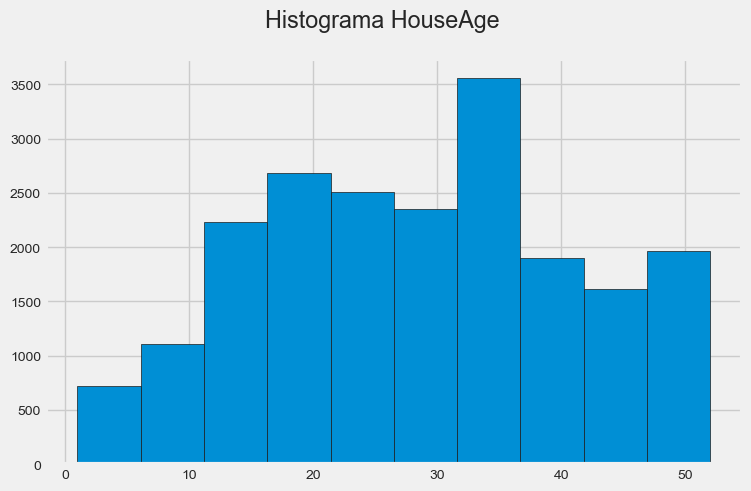

In [12]:
plt.style.use('fivethirtyeight')
fig , ax = plt.subplots(figsize=(8,5))
count , bins , bar = plt.hist(df_california['HouseAge'] , bins=10  , edgecolor='k' )
plt.tick_params(axis='both', which='major', labelsize=10)
plt.suptitle("Histograma HouseAge")

* Se hizo un histograma de HouseAge con menos bins dado que es el atributo que más se acemeja a una distribución gaussiana. Al realizarlo con menos bins, los outliers de la cola derecha se promedian, y desaparece la acumulación de valores atípícos.

In [13]:
# Armamos un DataFrame con los features
X = df_california.drop(columns='MedHouseVal')
# Y con la variable dependiente (target)
y = df_california["MedHouseVal"]

In [14]:
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [15]:
y.head()

0    4.526
1    3.585
2    3.521
3    3.413
4    3.422
Name: MedHouseVal, dtype: float64

In [16]:
# Separando nuestro dataset en entrenamiento y testeo, dejando 80% para entrenamiento y 20% para testeo.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2 , random_state=42)

In [17]:
print("Dimension de X_train:",X_train.shape)
print("Valores de y_train:",y_train.size)
print("Dimension de X_test:",X_test.shape)
print("Valores de y_test:",len(y_test))

Dimension de X_train: (16512, 8)
Valores de y_train: 16512
Dimension de X_test: (4128, 8)
Valores de y_test: 4128


In [18]:
from sklearn.preprocessing import StandardScaler

In [19]:
sc_X = StandardScaler()

X_train_scaled = sc_X.fit_transform(X_train)

print(f"Las medias del escalador es {sc_X.mean_}")

Las medias del escalador es [ 3.88075426e+00  2.86082849e+01  5.43523502e+00  1.09668475e+00
  1.42645300e+03  3.09696119e+00  3.56431492e+01 -1.19582290e+02]


In [20]:
print(f"Los desvío estándar del escalador es {np.sqrt(sc_X.var_)}")

Los desvío estándar del escalador es [1.90423626e+00 1.26021177e+01 2.38730258e+00 4.33201426e-01
 1.13702195e+03 1.15783935e+01 2.13660060e+00 2.00559281e+00]


In [21]:
# Escalemos el set de testeo
X_test_scaled = sc_X.transform(X_test)
X_test_scaled

array([[-1.15508475, -0.28632369, -0.52068576, ...,  0.06740798,
         0.1951    ,  0.28534728],
       [-0.70865905,  0.11043502, -0.16581537, ..., -0.03602975,
        -0.23549054,  0.06097472],
       [-0.21040155,  1.85617335, -0.61076476, ..., -0.14998876,
         1.00947776, -1.42487026],
       ...,
       [ 2.80902421, -0.28632369,  0.75501156, ..., -0.02646898,
         0.78014149, -1.23041404],
       [-0.57542978,  0.58654547, -0.06124296, ..., -0.04390537,
         0.52740357, -0.08860699],
       [-0.17259111, -0.92113763, -0.6058703 , ...,  0.05466644,
        -0.66608108,  0.60445493]])

In [22]:
regresion = LinearRegression()

regresion.fit(X_train_scaled, y_train)

print(f"El valor de la interseccion de la recta sera {regresion.intercept_ }")
print(f"Los valores de los coeficientes de la recta sera {regresion.coef_ }")

El valor de la interseccion de la recta sera 2.0719469373788777
Los valores de los coeficientes de la recta sera [ 0.85438303  0.12254624 -0.29441013  0.33925949 -0.00230772 -0.0408291
 -0.89692888 -0.86984178]


In [23]:
print(f"El coeficiente de Pearson es {regresion.score(X_train_scaled, y_train)}")

El coeficiente de Pearson es 0.6125511913966952


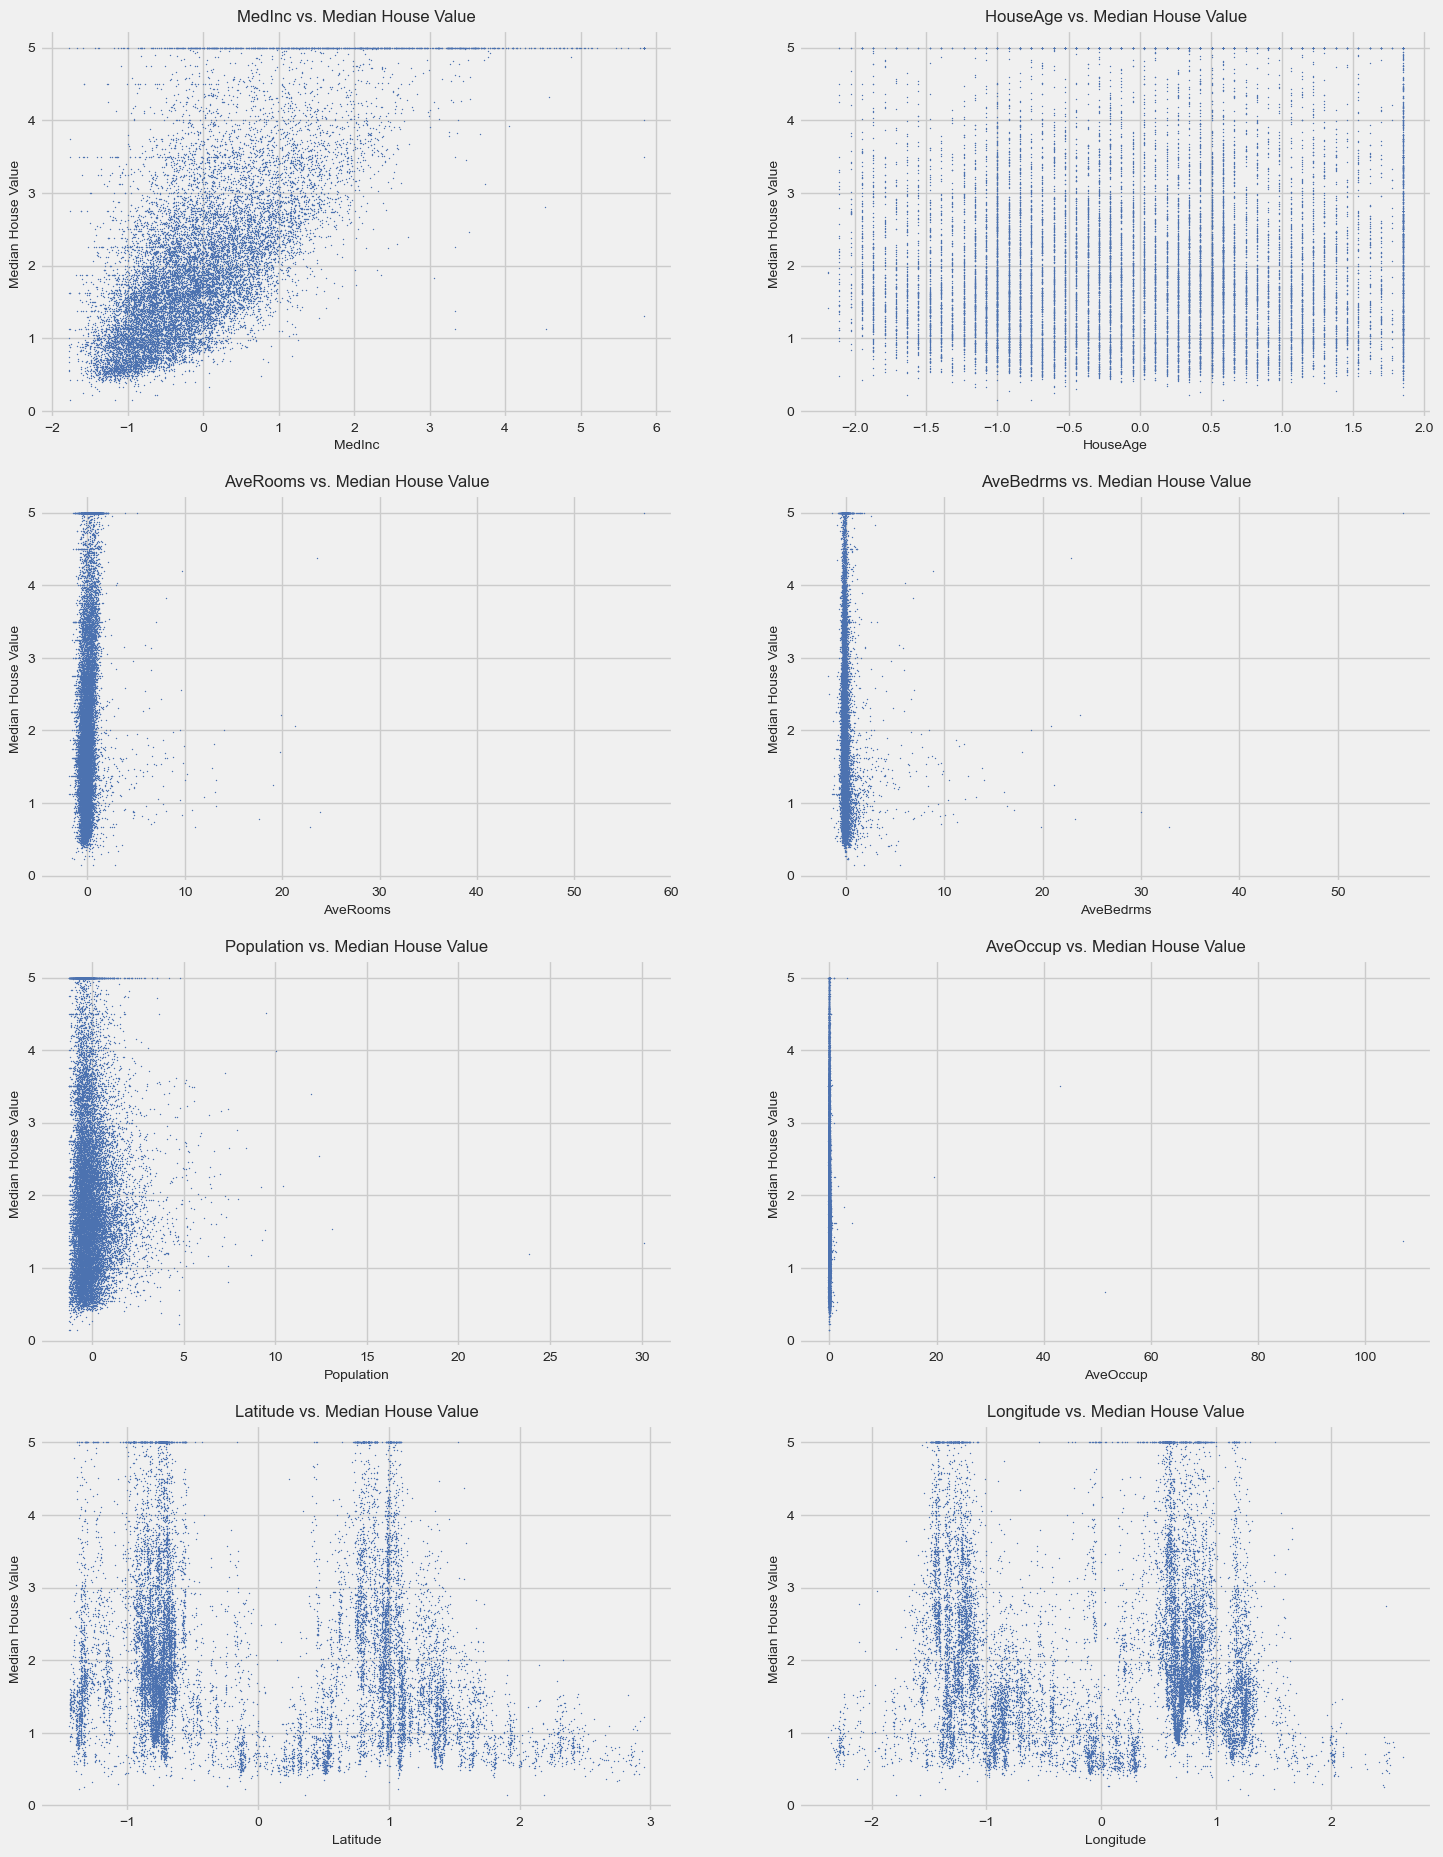

In [24]:
X_train_scaled_pd = pd.DataFrame(X_train_scaled, columns=california_housing['feature_names'])
X_test_scaled_pd = pd.DataFrame(X_test_scaled, columns=california_housing['feature_names'])

plt.figure(figsize=(16, 22))

for i, column in enumerate(X_train_scaled_pd.columns, 1):
    plt.subplot(4, 2, i)
    plt.title(f'{column} vs. Median House Value', fontsize=12)
    plt.xlabel(column, fontsize=10)
    plt.ylabel('Median House Value', fontsize=10)
    plt.tick_params(axis='x', labelsize=10)
    plt.tick_params(axis='y', labelsize=10)
    
    X_column = X_train_scaled_pd[[column]]
    y = y_train
    
    regresion = LinearRegression()
    regresion.fit(X_column, y)
    
    plt.scatter(X_column, y, color='b', marker=".", s=1)

In [25]:
# Calculamos el desvío estandar y la varianza explicada con el modelo.
std_label = np.std(y_train)
print(f"Desvío estándar del label {std_label}")

var_label = std_label**2
print(f"Varianza del label {var_label}")

Desvío estándar del label 1.156191252254324
Varianza del label 1.336778211789422


#### Interpretación

* Considerando los resultados de la varianza total de 0,51 y de varianza de label 1,13, son diferentes entres si, por ende, se podría concluir que no captura el comportamiento de la variable target. Por otra parte, los resultados indican que hay menor variabilidad de los datos respeto a su media.

In [26]:
# Calculamos las métricas de MSE, MAE y R2 de set de evaluación
# Obtenemos las predicciones del modelo
regresion.fit(X_train_scaled, y_train)
y_pred = regresion.predict(X_test_scaled)

In [27]:
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

In [28]:
print("R-cuadrado en test:", r2)
print("Error absoluto medio:", mae)
print("Error cuadratico medio:", mse)

R-cuadrado en test: 0.5757877060324508
Error absoluto medio: 0.5332001304956565
Error cuadratico medio: 0.5558915986952443


#### Interpretacion

* El coeficiente de determinación resultó de 0.57, por otra parte el error absoluto medio 0.53, el error cuadrático medio se tiene de 0.55.
La variable target esta diendo explicado por las variables atributos por alrededor de 53% a 57%, 
los valores encontrados no logran ser significativas, en terminos cuantitativos tendria que aproximarse a 1 o 100%.

In [29]:
# Calculamos el valor del hiperparámetro alpha

alpha_values = np.linspace(0, 12.5, 100)
alpha_values

array([ 0.        ,  0.12626263,  0.25252525,  0.37878788,  0.50505051,
        0.63131313,  0.75757576,  0.88383838,  1.01010101,  1.13636364,
        1.26262626,  1.38888889,  1.51515152,  1.64141414,  1.76767677,
        1.89393939,  2.02020202,  2.14646465,  2.27272727,  2.3989899 ,
        2.52525253,  2.65151515,  2.77777778,  2.9040404 ,  3.03030303,
        3.15656566,  3.28282828,  3.40909091,  3.53535354,  3.66161616,
        3.78787879,  3.91414141,  4.04040404,  4.16666667,  4.29292929,
        4.41919192,  4.54545455,  4.67171717,  4.7979798 ,  4.92424242,
        5.05050505,  5.17676768,  5.3030303 ,  5.42929293,  5.55555556,
        5.68181818,  5.80808081,  5.93434343,  6.06060606,  6.18686869,
        6.31313131,  6.43939394,  6.56565657,  6.69191919,  6.81818182,
        6.94444444,  7.07070707,  7.1969697 ,  7.32323232,  7.44949495,
        7.57575758,  7.7020202 ,  7.82828283,  7.95454545,  8.08080808,
        8.20707071,  8.33333333,  8.45959596,  8.58585859,  8.71

In [30]:
# Probamos con cada alpha el modelo: 

cv_list = []

for i in alpha_values:
    ridge_model = Ridge(alpha=i)
    cv = cross_val_score(ridge_model, X_train_scaled, y=y_train, scoring="neg_mean_squared_error", cv=5, n_jobs=-1).mean()
    cv_list.append(cv)
    
best_alpha = alpha_values[np.argmax(cv_list)]
print(f"El mejor alpha es: {best_alpha}")

El mejor alpha es: 0.12626262626262627


In [31]:
print(f"El MSE para el mejor alpha es: {max(cv_list)}")

El MSE para el mejor alpha es: -0.5192651995036195


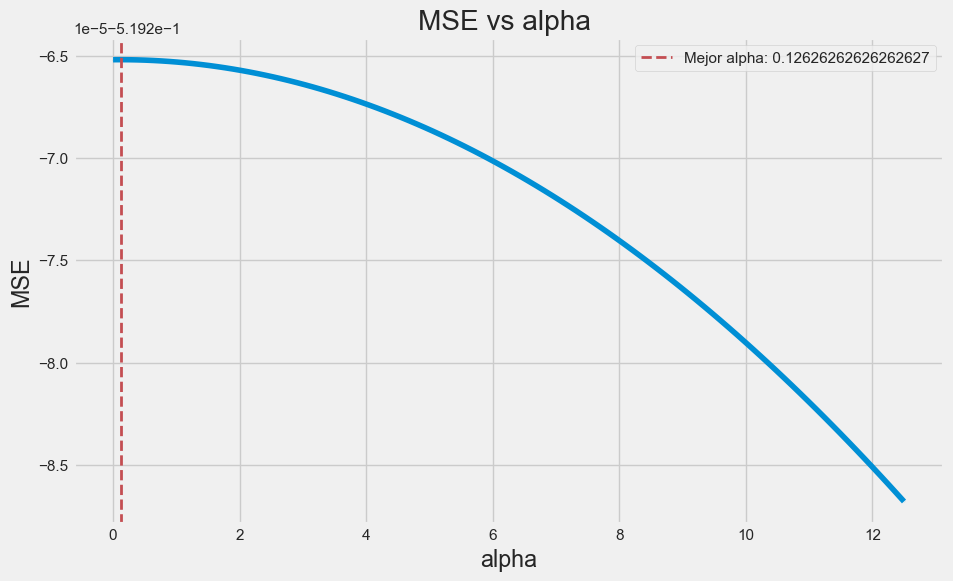

In [32]:
plt.figure(figsize=(10, 6))
plt.plot(alpha_values, cv_list, marker='.' , markersize='0.1')
plt.axvline(x=best_alpha, color='r', linestyle='--', label=f'Mejor alpha: {best_alpha}' , linewidth=2)
plt.xlabel('alpha')
plt.ylabel('MSE')
plt.title('MSE vs alpha ')
plt.legend()
plt.grid(True)
plt.show()

In [33]:
ridge_model = Ridge(alpha=best_alpha)
ridge_model.fit(X_train_scaled, y_train)
y_pred_ridge = ridge_model.predict(X_test_scaled)

r2_ridge = r2_score(y_test, y_pred_ridge)
mae_ridge = mean_absolute_error(y_test, y_pred_ridge)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)

In [34]:
print("\nRegresión de Ridge")
print("R-cuadrado en test:", r2_ridge)
print("Error absoluto medio:", mae_ridge)
print("Error cuadratico medio:", mse_ridge)


Regresión de Ridge
R-cuadrado en test: 0.5757912561913161
Error absoluto medio: 0.5331992267374351
Error cuadratico medio: 0.5558869465351931


In [35]:
print("\nRegresión lineal")
print("R-cuadrado en test:", r2)
print("Error absoluto medio:", mae)
print("Error cuadratico medio:", mse)


Regresión lineal
R-cuadrado en test: 0.5757877060324508
Error absoluto medio: 0.5332001304956565
Error cuadratico medio: 0.5558915986952443
